In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/yiyansun/qm_groupwork/main/data/datasource.csv?token=GHSAT0AAAAAACKY7VGF5HCAOYOQJRJOKHLWZLJEXCA')

In [4]:
df

,borough_name,borough_code,borough_area_hectare,green_area_hectare,blue _area_hectare,green+blue_area_hectare,percent_green,percent_blue,percent_green+blue,population,...,number_annual_age15+_females,meanpercent_homes_with_good_access,meanpercent_home_with_deficiency_access,any_neurotic_disorder_per1000,all_phobias_per1000,depressive_episode_per1000,generalised_anxiety_disorder_per1000,mixed_anxiety_depression,obsessive_compulsive_disorder_per1000,panic_ disorder_per1000
0,City of London,E09000001,314.94,17.61,24.31,41.92,5.59,7.72,13.31,"7,400",...,0,0,100,190.6,22.041537,39.516764,60.4,84.4,15.9,9.4
1,Barking and Dagenham,E09000002,3779.93,1481.78,230.50,1712.28,39.20,6.10,45.30,"185,900",...,2,72,28,177.5,21.301491,34.411868,51.1,82.6,15.2,8.2
2,Barnet,E09000003,8674.84,5030.91,60.01,5090.92,57.99,0.69,58.69,"356,400",...,13,82,18,167.4,19.969920,32.483563,49.0,77.4,14.1,7.9
3,Bexley,E09000004,6428.65,2759.07,437.52,3196.59,42.92,6.81,49.72,"232,000",...,4,83,17,155.6,18.456990,30.428115,45.9,71.7,13.0,7.3
4,Brent,E09000005,4323.27,1726.56,44.59,1771.15,39.94,1.03,40.97,"311,200",...,3,82,18,182.3,21.760559,35.195831,53.0,84.4,15.5,8.5
5,Bromley,E09000006,15013.49,10262.64,56.96,10319.60,68.36,0.38,68.74,"309,400",...,8,82,18,157.7,18.742408,30.980945,47.2,72.4,13.1,7.4
6,Camden,E09000007,2178.93,943.02,19.81,962.83,43.28,0.91,44.19,"220,300",...,8,71,29,206.3,24.698391,39.258031,58.5,97.0,17.8,9.5
7,Croydon,E09000008,8649.44,4802.84,11.56,4814.40,55.53,0.13,55.66,"363,400",...,6,70,30,172.4,20.718164,33.733624,50.9,79.5,14.6,8.0
8,Ealing,E09000009,5554.43,2441.65,52.21,2493.87,43.96,0.94,44.90,"338,400",...,1,75,25,174.4,20.809948,34.029337,51.7,80.0,14.7,8.2
9,Enfield,E09000010,8220.02,4352.73,424.01,4776.74,52.95,5.16,58.11,"312,500",...,2,54,46,170.7,20.369817,33.357213,50.4,78.7,14.4,7.9


In [5]:
df.columns

Index(['borough_name', 'borough_code', 'borough_area_hectare',
       'green_area_hectare', 'blue _area_hectare', 'green+blue_area_hectare',
       'percent_green', 'percent_blue', 'percent_green+blue', 'population',
       'death_persons', 'death_males', 'death_females',
       'standard_mortality_ratio_persons', 'standard_mortality_ratio_males',
       'standard_mortality_ratio_females', 'life_expectancy_birth_males',
       'life_expectancy_birth_females', 'life_expectancy_65_males',
       'life_expectancy_65_females', 'DSR_annual_age15+_persons',
       'DSR_annual_age15+_males', 'DSR_annual_age15+_females',
       'number_annual_age15+_persons', 'number_annual_age15+_males',
       'number_annual_age15+_females', 'meanpercent_homes_with_good_access',
       'meanpercent_home_with_deficiency_access',
       'any_neurotic_disorder_per1000', 'all_phobias_per1000',
       'depressive_episode_per1000', 'generalised_anxiety_disorder_per1000',
       'mixed_anxiety_depression', 'obsessi

In [6]:
pop = ['population']
df.sample(5, random_state=42)[pop]

,population
31,"307,000"
15,"237,200"
26,"187,000"
17,"254,000"
8,"338,400"


In [7]:
for p in pop:
    print(f"Converting {p}")
    df[p] = df[p].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')

Converting population


In [8]:
df.sample(5, random_state=42)[pop]

,population
31,307000.0
15,237200.0
26,187000.0
17,254000.0
8,338400.0


In [9]:
death = ['death_persons']
df.sample(5, random_state=42)[death]

,death_persons
31,"1,442"
15,"2,193"
26,"1,110"
17,"1,372"
8,"1,889"


In [10]:
for d in death:
    print(f"Converting {d}")
    df[d] = df[d].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')

Converting death_persons


In [11]:
df.sample(5, random_state=42)[death]

,death_persons
31,1442.0
15,2193.0
26,1110.0
17,1372.0
8,1889.0


In [12]:
df['death_persons'].max()

2631.0

### Green area distribution

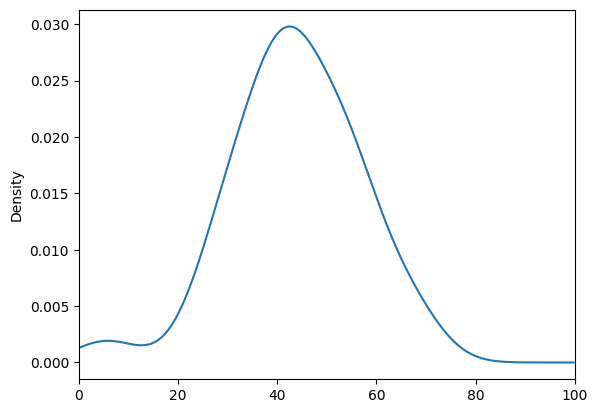

In [13]:
df.percent_green.plot.kde(xlim=(0,100));

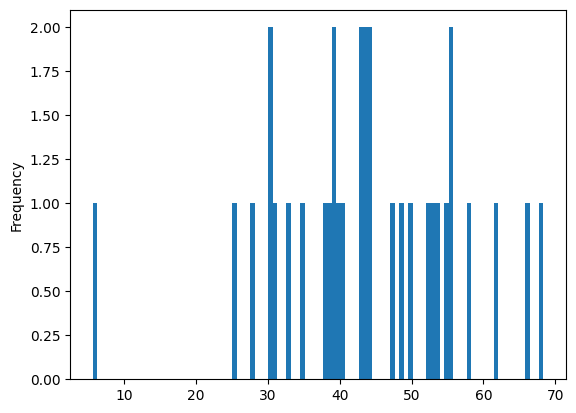

In [14]:
df.percent_green.plot.hist(bins=100);

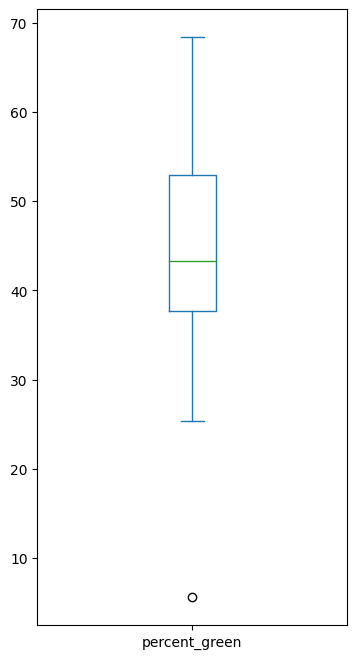

In [15]:
df.percent_green.plot.box(figsize=(4, 8)); # boxplot

### Exploratory data analysis

**Green space and life expectancy**

<Axes: xlabel='life_expectancy_birth_females', ylabel='percent_green'>

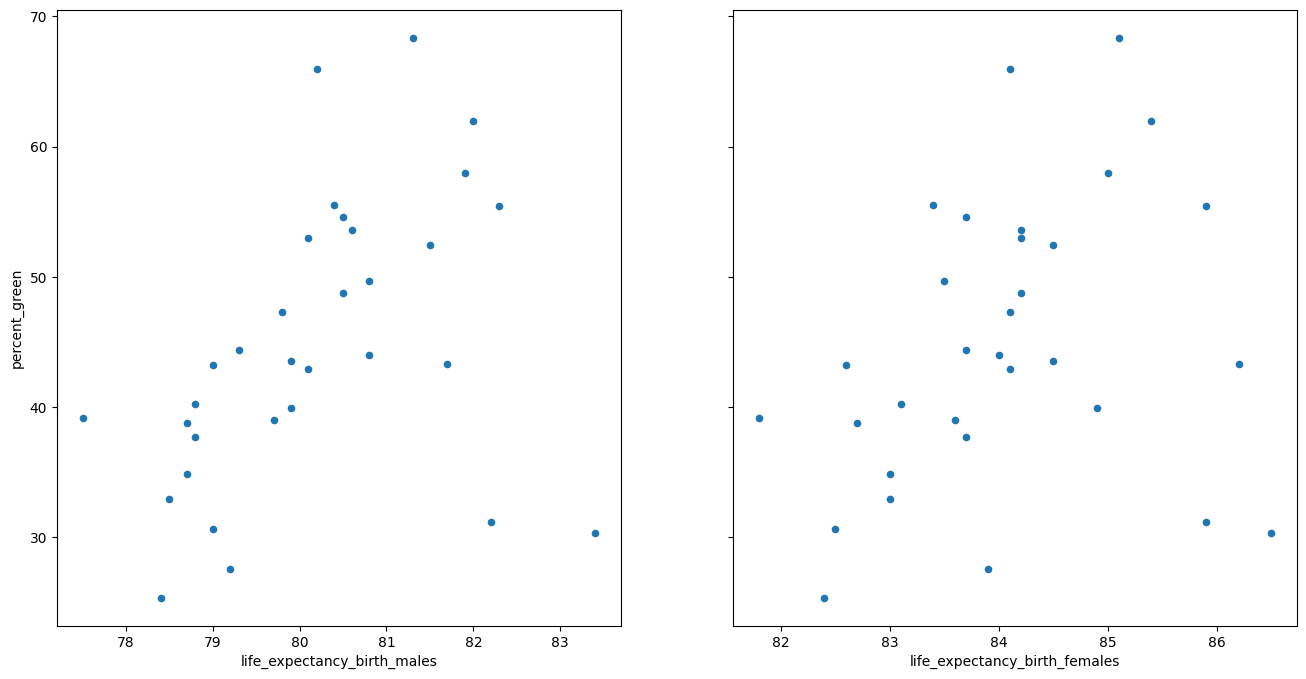

In [16]:
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter', x='life_expectancy_birth_males', y='percent_green', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='life_expectancy_birth_females', y='percent_green', ax=axs[1])

**Green space and deaths**

<Axes: xlabel='death_females', ylabel='percent_green'>

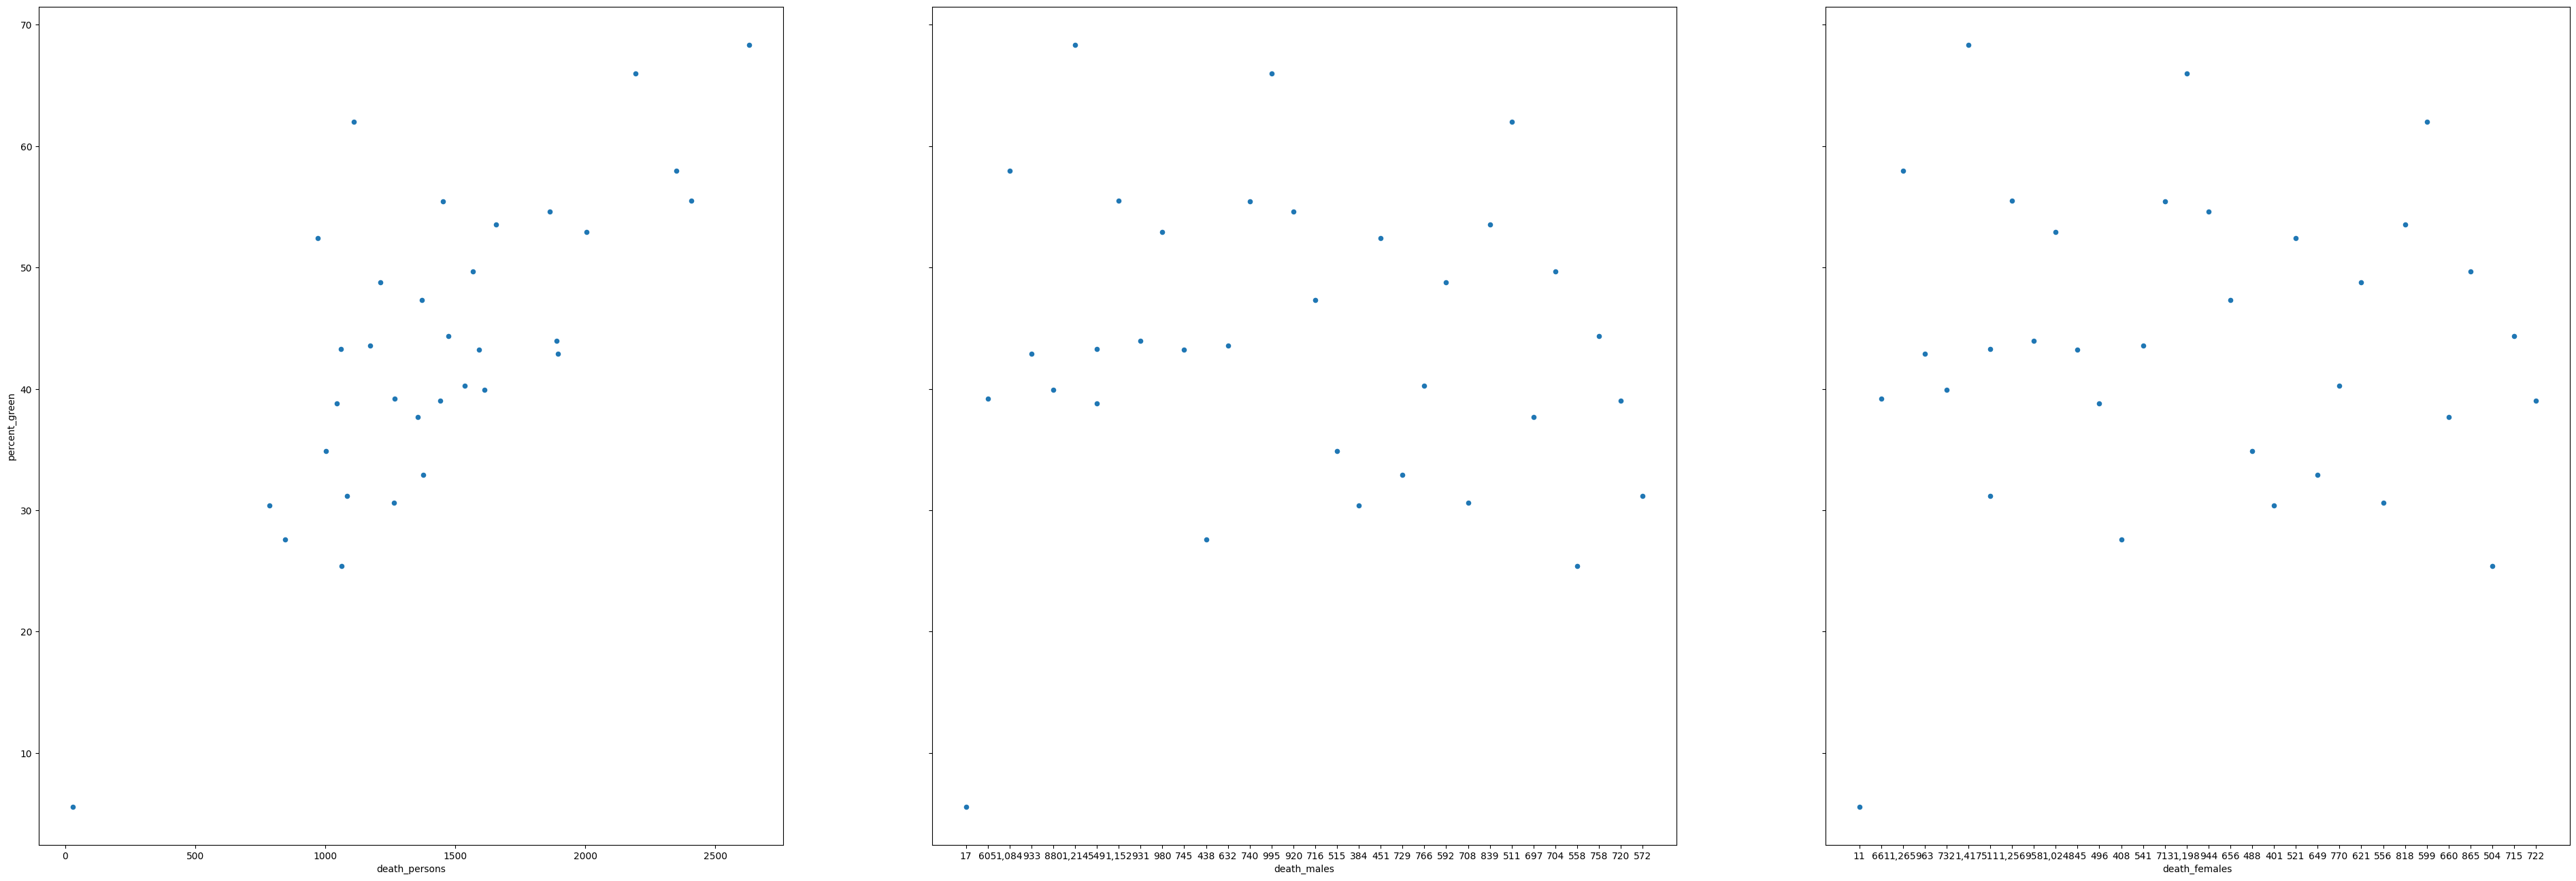

In [17]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='death_persons', y='percent_green', ax=axs[0], figsize=(48, 16))
df.plot(kind='scatter', x='death_males', y='percent_green', ax=axs[1])
df.plot(kind='scatter', x='death_females', y='percent_green', ax=axs[2])

**Green Space and Mental Health:**

<Axes: xlabel='panic_ disorder_per1000', ylabel='percent_green'>

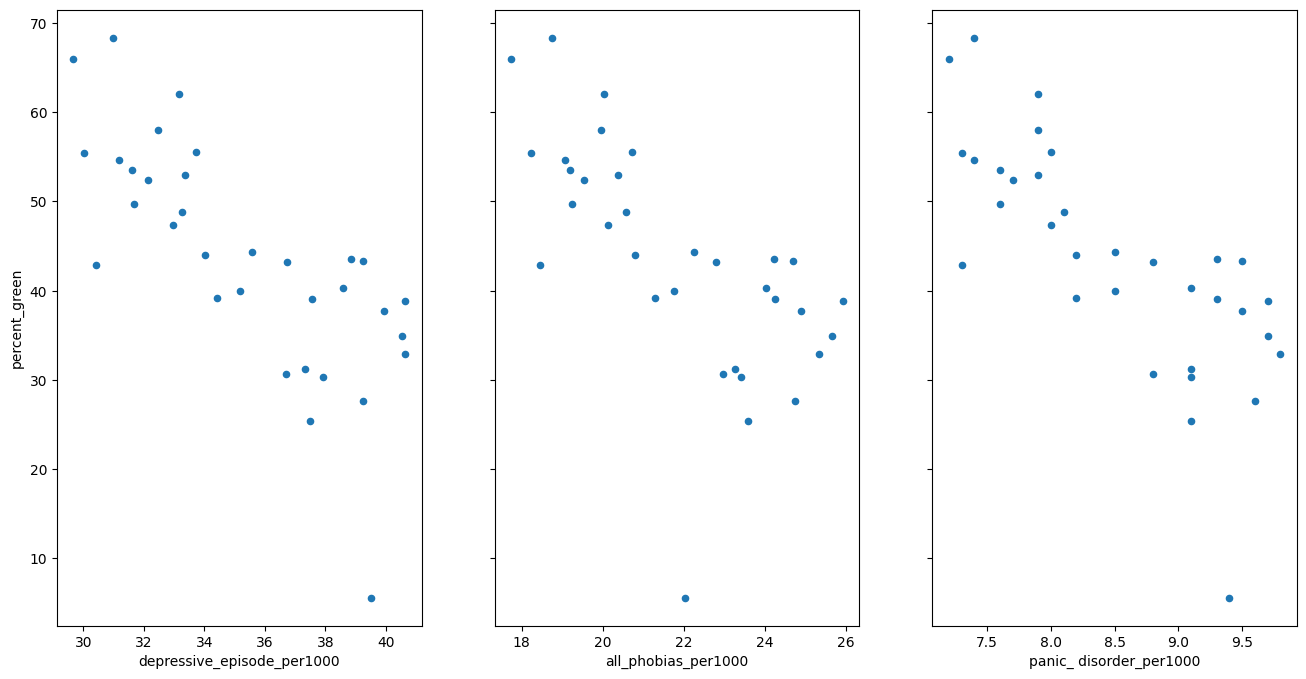

In [20]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='depressive_episode_per1000', y='percent_green', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='all_phobias_per1000', y='percent_green', ax=axs[1])
df.plot(kind='scatter', x='panic_ disorder_per1000', y='percent_green', ax=axs[2])